<a href="https://colab.research.google.com/github/Reagan-Reid-Git/intro-ml-course-winter2025/blob/main/6_HAD7001_S25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings
import statsmodels.api as sm

In [2]:
from google.colab import files
import pandas as pd
import io
uploaded = files.upload()

Saving full_ml.csv to full_ml.csv


In [3]:
df= pd.read_csv('full_ml.csv')
df

,SEQN,DXATRST,DXATRTV,DXXANFM,DXXANLM,DXXANTOM,DXXGYFM,DXXGYLM,DXXGYTOM,DXXAGRAT,...,FAMILYPIR,EVERSMOKER,SMOKER,BMI,PERMTH_EXM,MORTSTAT,surveyyr,mortstat5yr,mortstat7yr,DXDTOPF_mean
0,21005.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.44,NaN,NaN,50.85,201.0,0.0,304,0.0,0.0,42.02
1,21006.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.47,NaN,NaN,20.78,NaN,NaN,304,NaN,NaN,NaN
2,21007.0,1.0,0.0,701.7,2207.7,2909.4,2979.1,5383.8,8362.8,0.7,...,1.60,NaN,NaN,18.43,NaN,NaN,304,NaN,NaN,26.90
3,21008.0,1.0,0.0,496.6,3243.6,3740.2,1840.6,8709.4,10550.0,0.8,...,2.75,NaN,NaN,20.65,NaN,NaN,304,NaN,NaN,16.00
4,21009.0,1.0,0.0,3657.2,5433.9,9091.2,5031.3,10900.9,15932.1,1.3,...,3.79,2.0,NaN,31.26,195.0,0.0,304,0.0,0.0,31.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37163,102949.0,NaN,NaN,700.5,4746.0,5446.5,2307.8,9485.5,11793.3,0.7,...,1.01,1.0,1.0,23.70,34.0,0.0,1718,0.0,0.0,NaN
37164,102953.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,3.0,35.80,30.0,0.0,1718,0.0,0.0,NaN
37165,102954.0,NaN,NaN,1203.1,2852.5,4055.6,4182.3,6080.6,10262.8,0.7,...,1.18,2.0,NaN,26.10,17.0,0.0,1718,0.0,0.0,NaN
37166,102955.0,NaN,NaN,4174.5,4290.2,8464.7,8502.4,10434.5,18936.9,1.1,...,2.24,NaN,NaN,45.60,NaN,NaN,1718,NaN,NaN,NaN


## **Data Cleaning**###

In [4]:
df['Combo_Smoke']= (df['EVERSMOKER'] ==1) | (df['SMOKER']==1).astype(int)
df

,SEQN,DXATRST,DXATRTV,DXXANFM,DXXANLM,DXXANTOM,DXXGYFM,DXXGYLM,DXXGYTOM,DXXAGRAT,...,EVERSMOKER,SMOKER,BMI,PERMTH_EXM,MORTSTAT,surveyyr,mortstat5yr,mortstat7yr,DXDTOPF_mean,Combo_Smoke
0,21005.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,50.85,201.0,0.0,304,0.0,0.0,42.02,False
1,21006.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,20.78,NaN,NaN,304,NaN,NaN,NaN,False
2,21007.0,1.0,0.0,701.7,2207.7,2909.4,2979.1,5383.8,8362.8,0.7,...,NaN,NaN,18.43,NaN,NaN,304,NaN,NaN,26.90,False
3,21008.0,1.0,0.0,496.6,3243.6,3740.2,1840.6,8709.4,10550.0,0.8,...,NaN,NaN,20.65,NaN,NaN,304,NaN,NaN,16.00,False
4,21009.0,1.0,0.0,3657.2,5433.9,9091.2,5031.3,10900.9,15932.1,1.3,...,2.0,NaN,31.26,195.0,0.0,304,0.0,0.0,31.60,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37163,102949.0,NaN,NaN,700.5,4746.0,5446.5,2307.8,9485.5,11793.3,0.7,...,1.0,1.0,23.70,34.0,0.0,1718,0.0,0.0,NaN,True
37164,102953.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,3.0,35.80,30.0,0.0,1718,0.0,0.0,NaN,True
37165,102954.0,NaN,NaN,1203.1,2852.5,4055.6,4182.3,6080.6,10262.8,0.7,...,2.0,NaN,26.10,17.0,0.0,1718,0.0,0.0,NaN,False
37166,102955.0,NaN,NaN,4174.5,4290.2,8464.7,8502.4,10434.5,18936.9,1.1,...,NaN,NaN,45.60,NaN,NaN,1718,NaN,NaN,NaN,False


In [10]:
dffp=df.loc[df['PERMTH_EXM']<=84]
dffp=dffp.loc[dffp['EDUCATION']<7]
dffp=dffp.loc[dffp['BMI']>18.5]
dffp


,SEQN,DXATRST,DXATRTV,DXXANFM,DXXANLM,DXXANTOM,DXXGYFM,DXXGYLM,DXXGYTOM,DXXAGRAT,...,EVERSMOKER,SMOKER,BMI,PERMTH_EXM,MORTSTAT,surveyyr,mortstat5yr,mortstat7yr,DXDTOPF_mean,Combo_Smoke
8,21015.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,3.0,28.32,24.0,1.0,304,1.0,1.0,30.82,True
25,21036.0,1.0,0.0,2032.9,3132.1,5165.0,3958.4,4775.4,8733.8,0.9,...,2.0,NaN,23.37,84.0,1.0,304,0.0,0.0,40.50,False
26,21037.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,3.0,22.26,6.0,1.0,304,1.0,1.0,27.74,True
56,21074.0,1.0,0.0,2761.8,4270.4,7032.2,5666.2,7511.3,13177.5,0.9,...,1.0,3.0,29.94,71.0,1.0,304,0.0,1.0,40.84,True
92,21118.0,1.0,0.0,1864.1,3099.6,4963.7,2918.8,6354.7,9273.4,1.2,...,1.0,1.0,25.76,62.0,1.0,304,0.0,1.0,31.20,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37162,102948.0,NaN,NaN,930.3,2559.3,3489.5,3155.2,6147.8,9303.0,0.8,...,1.0,3.0,20.20,14.0,0.0,1718,0.0,0.0,NaN,True
37163,102949.0,NaN,NaN,700.5,4746.0,5446.5,2307.8,9485.5,11793.3,0.7,...,1.0,1.0,23.70,34.0,0.0,1718,0.0,0.0,NaN,True
37164,102953.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,3.0,35.80,30.0,0.0,1718,0.0,0.0,NaN,True
37165,102954.0,NaN,NaN,1203.1,2852.5,4055.6,4182.3,6080.6,10262.8,0.7,...,2.0,NaN,26.10,17.0,0.0,1718,0.0,0.0,NaN,False


In [ ]:
print(dffp.isna().sum())

SEQN                   0
DXATRST            11739
DXATRTV            11890
DXXANFM             1997
DXXANLM             1997
DXXANTOM            1997
DXXGYFM             1992
DXXGYLM             1992
DXXGYTOM            1992
DXXAGRAT            2014
DXXAPFAT            1997
DXXGPFAT            1992
DXXAGST              714
DXXVATV             2168
DXXANTV             2168
DXXGYTV             2168
DXXSATA             2467
DXXSATM             2467
DXXSATV             2467
DXXTATA             2467
DXXTATM             2467
DXXTATV             2467
DXXVFATA            2467
DXXVFATM            2467
DXXVFATV            2467
SDDSRVYR               0
ADHERENCE            105
age                    0
sex                    0
ETHNIC                 0
EDUCATION              4
HEALTHINSURANCE        2
FAMILYPIR           1187
EVERSMOKER            21
SMOKER              7664
BMI                  166
PERMTH_EXM             0
MORTSTAT               0
surveyyr               0
mortstat5yr            0


# ***Analytic Sample Creation (Complete Case)***

In [33]:
# Specify the variables you want to include in the complete case analysis
variables_asample = [
   'DXXAPFAT', 'DXXGPFAT', 'BMI', 'age', 'sex', 'ADHERENCE',
    'ETHNIC', 'FAMILYPIR', 'EDUCATION', 'Combo_Smoke', 'PERMTH_EXM', 'mortstat7yr']  # Replace with your actual variable names

# Create a new DataFrame with only the specified variables
asample_var_subset = dffp[variables_asample]

# Drop rows with any missing values in the specified variables
asample = asample_var_subset.dropna()

# Now dffp_complete contains only complete cases for the selected variables
print(asample.head())
print(asample.isna().sum())


     DXXAPFAT  DXXGPFAT    BMI  age  sex  ADHERENCE  ETHNIC  FAMILYPIR  \
25       39.4      45.3  23.37   85    2        0.0       3       3.34   
92       37.6      31.5  25.76   66    1        0.0       1       1.39   
108      47.1      46.9  36.94   65    1        0.0       3       5.00   
156      41.2      29.5  26.20   62    1        0.0       1       1.20   
157      30.1      38.6  20.76   40    2        2.0       4       0.28   

     EDUCATION  Combo_Smoke  PERMTH_EXM  mortstat7yr  
25         1.0        False        84.0          0.0  
92         1.0         True        62.0          1.0  
108        1.0         True        34.0          1.0  
156        1.0        False        55.0          1.0  
157        3.0         True        31.0          1.0  
DXXAPFAT       0
DXXGPFAT       0
BMI            0
age            0
sex            0
ADHERENCE      0
ETHNIC         0
FAMILYPIR      0
EDUCATION      0
Combo_Smoke    0
PERMTH_EXM     0
mortstat7yr    0
dtype: int64


In [12]:
asample['Combo_Smoke'] = asample['Combo_Smoke'].astype(int)

<ipython-input-12-45c5687e5f30>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asample['Combo_Smoke'] = asample['Combo_Smoke'].astype(int)


In [40]:

# Define BMI categories
def bmi_category(bmi):
    if 18.5 <= bmi < 25:
        return 0
    elif 25 <= bmi < 30:
        return 1
    else:
        return 2

# Apply the function to create a new 'BMI_Category' column
asample['BMI_Category'] = asample['BMI'].apply(bmi_category)

# Now you can use the 'BMI_Category' column for analysis or visualization
print(asample[['BMI', 'BMI_Category']].head())


       BMI  BMI_Category
25   23.37             0
92   25.76             1
108  36.94             2
156  26.20             1
157  20.76             0


<ipython-input-40-7ccb50020679>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asample['BMI_Category'] = asample['BMI'].apply(bmi_category)


In [39]:
# Define Age categories
def age_category(age):
    if age >= 65:
        return 1
    else:
        return 0

# Apply the function to create a new 'AGE_Category' column
asample['AGE_Category'] = asample['age'].apply(age_category)

# Now you can use the 'AGE_Category' column for analysis or visualization
print(asample[['age', 'AGE_Category']].head())

     age  AGE_Category
25    85             1
92    66             1
108   65             1
156   62             0
157   40             0


<ipython-input-39-5fbcbdd70685>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asample['AGE_Category'] = asample['age'].apply(age_category)


In [38]:
# Define Education categories
def edu_category(EDUCATION):
    if EDUCATION == 1:
        return 1
    elif EDUCATION == 2:
        return 1
    else:
        return 0

# Apply the function to create a new 'EDU_Category' column
asample['EDU_Category'] = asample['EDUCATION'].apply(edu_category)

# Now you can use the 'EDU_Category' column for analysis or visualization
print(asample[['EDUCATION', 'EDU_Category']].head())

     EDUCATION  EDU_Category
25         1.0             1
92         1.0             1
108        1.0             1
156        1.0             1
157        3.0             0


<ipython-input-38-9e9a29d21034>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asample['EDU_Category'] = asample['EDUCATION'].apply(edu_category)


In [37]:
# Define Eth categories
def eth_category(ETHNIC):
    if ETHNIC == 3:
        return 0
    else:
        return 1

# Apply the function to create a new 'ETH_Category' column
asample['ETH_Category'] = asample['ETHNIC'].apply(eth_category)

# Now you can use the 'ETH_Category' column for analysis or visualization
print(asample[['ETHNIC', 'ETH_Category']].head())

     ETHNIC  ETH_Category
25        3             0
92        1             1
108       3             0
156       1             1
157       4             1


<ipython-input-37-ce78ced78978>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asample['ETH_Category'] = asample['ETHNIC'].apply(eth_category)


In [19]:
description= asample.describe()
description

,DXXAPFAT,DXXGPFAT,BMI,age,sex,ADHERENCE,ETHNIC,FAMILYPIR,EDUCATION,Combo_Smoke,PERMTH_EXM,mortstat7yr,BMI_Category,AGE_Category,EDU_Category,ETH_Category
count,9241.000000,9241.000000,9241.000000,9241.000000,9241.000000,9241.000000,9241.000000,9241.000000,9241.000000,9241.000000,9241.000000,9241.000000,9241.000000,9241.000000,9241.000000,9241.000000
mean,35.387826,35.462775,29.089927,39.658479,1.495509,1.254951,3.160156,2.479152,2.376474,0.388811,50.200628,0.064495,1.067850,0.029434,0.431339,0.634563
std,9.054103,8.758988,6.888500,13.900069,0.500007,0.913069,1.266406,1.645049,0.786881,0.487507,20.821702,0.245646,0.827716,0.169029,0.495290,0.481578
min,8.100000,8.700000,18.590000,18.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.400000,28.500000,24.000000,28.000000,1.000000,0.000000,3.000000,1.060000,2.000000,0.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.300000,35.600000,27.900000,40.000000,1.000000,2.000000,3.000000,2.100000,3.000000,0.000000,51.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,42.200000,42.700000,32.800000,50.000000,2.000000,2.000000,4.000000,4.000000,3.000000,1.000000,68.000000,0.000000,2.000000,0.000000,1.000000,1.000000
max,58.800000,61.900000,68.600000,85.000000,2.000000,2.000000,5.000000,5.000000,3.000000,1.000000,84.000000,1.000000,2.000000,1.000000,1.000000,1.000000


In [131]:
freq_asample = asample.drop(columns=['DXXAPFAT', 'DXXGPFAT', 'BMI', 'age',
     'FAMILYPIR', 'PERMTH_EXM', 'mortstat7yr'])

In [133]:
for col in freq_asample.columns:
    print(f"Variable: {col}")

    # Frequency counts (including NaN if any)
    counts =freq_asample[col].value_counts

    # Percentage (normalize=True gives proportions, multiply by 100 for %)
    percents = freq_asample[col].value_counts(normalize=True) * 100

    # Combine into a small table
    freq_table = pd.DataFrame({
        'Count': counts,
        'Percent': percents.round(2)  # round to 2 decimal places
    })

    print(freq_table)

Variable: sex
                                                 Count  Percent
sex                                                            
1    <bound method IndexOpsMixin.value_counts of 25...    50.45
2    <bound method IndexOpsMixin.value_counts of 25...    49.55
Variable: ADHERENCE
                                                       Count  Percent
ADHERENCE                                                            
2.0        <bound method IndexOpsMixin.value_counts of 25...    57.68
0.0        <bound method IndexOpsMixin.value_counts of 25...    32.18
1.0        <bound method IndexOpsMixin.value_counts of 25...    10.14
Variable: ETHNIC
                                                    Count  Percent
ETHNIC                                                            
3       <bound method IndexOpsMixin.value_counts of 25...    36.54
4       <bound method IndexOpsMixin.value_counts of 25...    20.73
5       <bound method IndexOpsMixin.value_counts of 25...    17.79
1       

In [121]:
con1_asample = asample.drop(columns=['BMI_Category','AGE_Category',
             'ETH_Category','EDU_Category', 'mortstat7yr'])

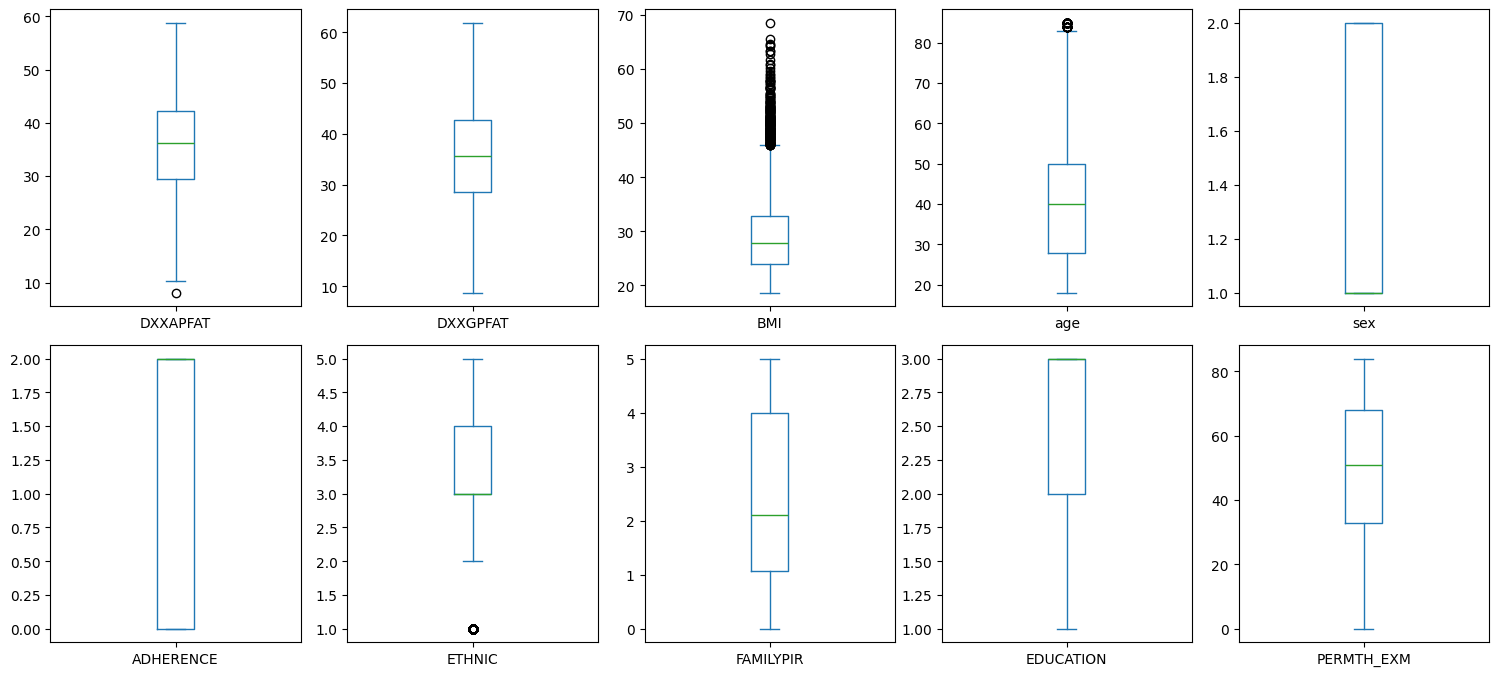

In [122]:
con1_asample.plot(kind='box', subplots=True, layout=(3, 5), figsize=(15, 10))
plt.tight_layout()
plt.show()

In [128]:
corr_asample = asample.drop(columns=['BMI_Category','AGE_Category',
             'ETH_Category','EDU_Category'])

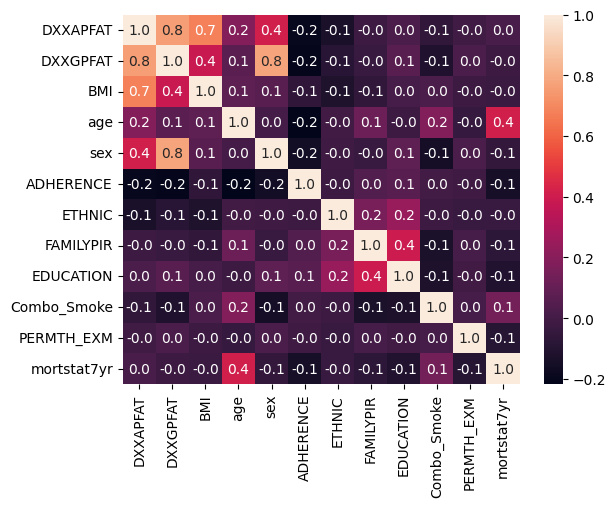

In [129]:
corr_m=corr_asample.corr()
sns.heatmap(corr_m, annot=True, fmt=".1f")
plt.show()

# ***Train-Validation-Test***

In [50]:
# Split the data into features and target variable
X = asample[['DXXAPFAT','DXXGPFAT', 'BMI','BMI_Category','age','AGE_Category',
             'sex','ADHERENCE','ETHNIC','ETH_Category','FAMILYPIR','EDUCATION','EDU_Category','Combo_Smoke']]
y = asample['mortstat7yr']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Split train set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

# Normalizing data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)



In [55]:
X_val_df = pd.DataFrame(X_val, columns=['DXXAPFAT', 'DXXGPFAT','BMI','BMI_Category', 'age', 'AGE_Category',
                                        'sex', 'ADHERENCE', 'ETHNIC', 'ETH_Category', 'FAMILYPIR',
                                        'EDUCATION', 'EDU_Category', 'Combo_Smoke'])

X_test_df = pd.DataFrame(X_test, columns=['DXXAPFAT', 'DXXGPFAT','BMI','BMI_Category', 'age', 'AGE_Category',
                                        'sex', 'ADHERENCE', 'ETHNIC', 'ETH_Category', 'FAMILYPIR',
                                        'EDUCATION', 'EDU_Category', 'Combo_Smoke'])

# ***Univariate Model***

In [58]:
# Features for model
X_train_uni = X_train[:, [0, 1, 2]]  # Select columns corresponding to 'DXXAPFAT', 'DXXGPFAT', 'BMI' from the NumPy array
X_val_uni = X_val[:, [0, 1, 2]]  # Select columns corresponding to 'DXXAPFAT', 'DXXGPFAT', 'BMI' from the NumPy array
y_val_uni = y_val

In [59]:
# Training logistic regression model
log_uni = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
log_uni.fit(X_train_uni, y_train)

LogisticRegression(solver='liblinear')

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Confusion Matrix:
[[1384    0]
 [  95    0]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      1384
         1.0       0.00      0.00      0.00        95

    accuracy                           0.94      1479
   macro avg       0.47      0.50      0.48      1479
weighted avg       0.88      0.94      0.90      1479



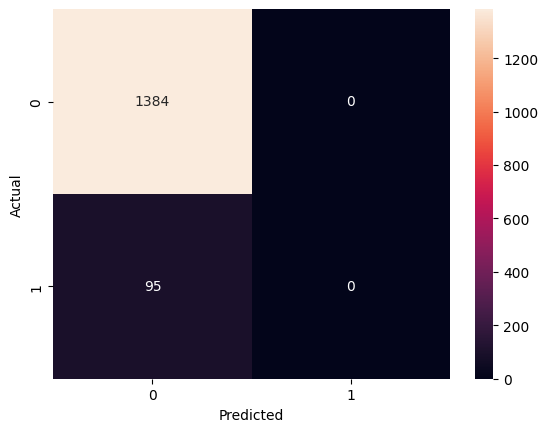

In [62]:
# Use the model to make predictions on the testing data
y_val_pred = log_uni.predict(X_val_uni)

# Evaluate the model
conf_matrix = confusion_matrix(y_val_uni, y_val_pred)
class_report = classification_report(y_val_uni, y_val_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

AUC Score: 0.574870702768482


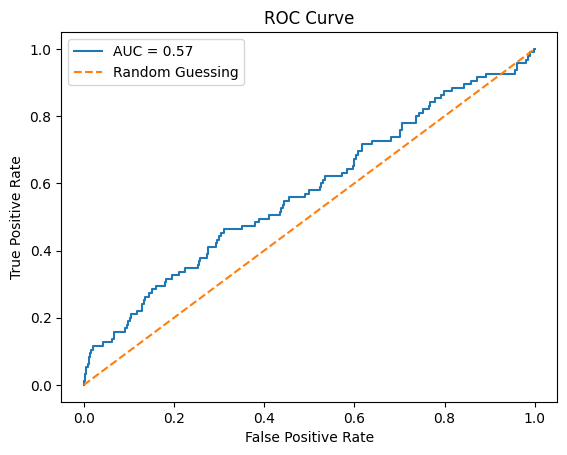

In [68]:
# Calculate the AUC score
y_val_pred_prob = log_uni.predict_proba(X_val_uni)[:, 1] # Use predict with the modified X_test_sm

auc = roc_auc_score(y_val_uni, y_val_pred_prob)
print(f"AUC Score: {auc}")

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_val_uni, y_val_pred_prob)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')  # Random guessing line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


# ***Univariate Model (Cat)***

In [69]:
# Features for model
X_train_unic = X_train[:, [0, 1, 3]]  # Select columns corresponding to 'DXXAPFAT', 'DXXGPFAT', 'BMI_Category' from the NumPy array
X_val_unic = X_val[:, [0, 1, 3]]  # Select columns corresponding to 'DXXAPFAT', 'DXXGPFAT', 'BMI_Category' from the NumPy array
y_val_unic = y_val

In [70]:
# Training logistic regression model
log_uni = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
log_uni.fit(X_train_unic, y_train)

LogisticRegression(solver='liblinear')

Confusion Matrix:
[[1384    0]
 [  95    0]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      1384
         1.0       0.00      0.00      0.00        95

    accuracy                           0.94      1479
   macro avg       0.47      0.50      0.48      1479
weighted avg       0.88      0.94      0.90      1479



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


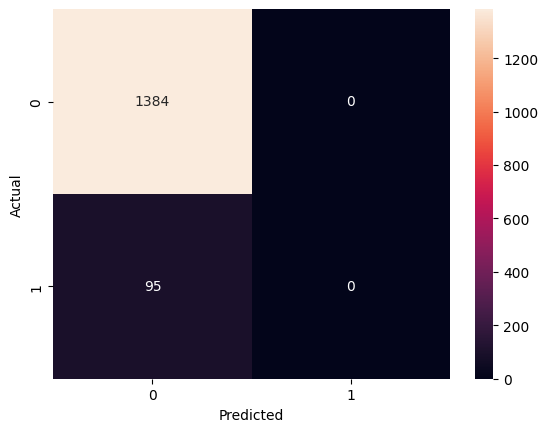

In [71]:
# Use the model to make predictions on the testing data
y_val_pred = log_uni.predict(X_val_unic)

# Evaluate the model
conf_matrix = confusion_matrix(y_val_unic, y_val_pred)
class_report = classification_report(y_val_unic, y_val_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

AUC Score: 0.5596972923638577


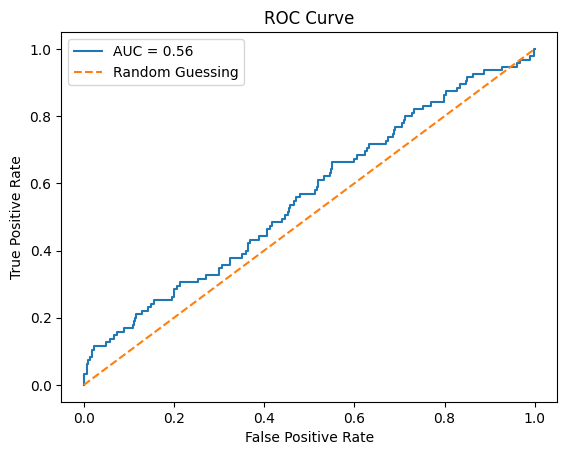

In [72]:
# Calculate the AUC score
y_val_pred_prob = log_uni.predict_proba(X_val_unic)[:, 1] # Use predict with the modified X_test_sm

auc = roc_auc_score(y_val_unic, y_val_pred_prob)
print(f"AUC Score: {auc}")

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_val_unic, y_val_pred_prob)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')  # Random guessing line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


# ***Multivariate Model***

In [74]:
# Features for model
X_train_multi = X_train[:, [0, 1, 2, 4, 6, 7, 8, 10, 11, 13]]  # Select columns corresponding to 'DXXAPFAT', 'DXXGPFAT', 'BMI(continous), age, sex, physical activty,ethnicity, pir, education, and smkoing'
X_val_multi = X_val[:, [0, 1, 2, 4, 6, 7, 8, 10, 11, 13]]  # Select columns corresponding to same selection as above
y_val_multi = y_val

In [75]:
# Training logistic regression model
log_multi = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
log_multi.fit(X_train_multi, y_train)

LogisticRegression(solver='liblinear')

Confusion Matrix:
[[1383    1]
 [  56   39]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      1384
         1.0       0.97      0.41      0.58        95

    accuracy                           0.96      1479
   macro avg       0.97      0.70      0.78      1479
weighted avg       0.96      0.96      0.95      1479



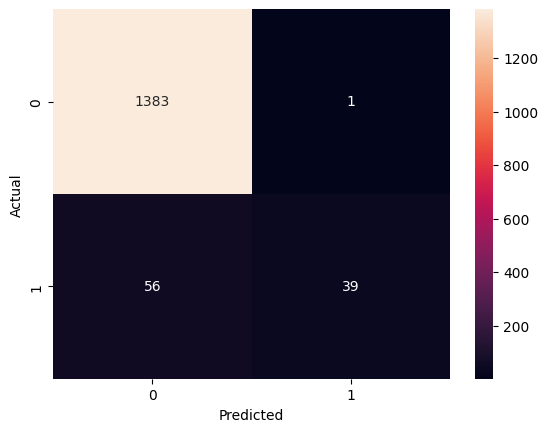

In [76]:
# Use the model to make predictions on the testing data
y_val_pred = log_multi.predict(X_val_multi)

# Evaluate the model
conf_matrix = confusion_matrix(y_val_multi, y_val_pred)
class_report = classification_report(y_val_multi, y_val_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

AUC Score: 0.8721402494675996


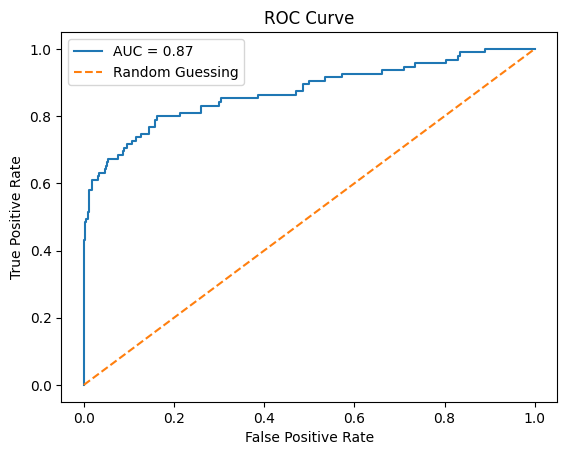

In [77]:
# Calculate the AUC score
y_val_pred_prob = log_multi.predict_proba(X_val_multi)[:, 1] # Use predict with the modified X_test_sm

auc = roc_auc_score(y_val_multi, y_val_pred_prob)
print(f"AUC Score: {auc}")

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_val_multi, y_val_pred_prob)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')  # Random guessing line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# ***Multivariate Model 2 (Cat)***

In [78]:
# Features for model
X_train_multic = X_train[:, [0, 1, 3, 5, 6, 7, 9, 10, 12, 13]]  # Select columns corresponding to 'DXXAPFAT', 'DXXGPFAT', 'BMIcat', agecat, sex, physical activty,ethnicitycat, pir, educationcat, and smkoing'
X_val_multic = X_val[:, [0, 1, 3, 5, 6, 7, 9, 10, 12, 13]]  # Select columns corresponding to same selection as above
y_val_multic = y_val

In [ ]:
# Training logistic regression model
log_multic = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
log_multic.fit(X_train_multic, y_train)

Confusion Matrix:
[[1383    1]
 [  53   42]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      1384
         1.0       0.98      0.44      0.61        95

    accuracy                           0.96      1479
   macro avg       0.97      0.72      0.79      1479
weighted avg       0.96      0.96      0.96      1479



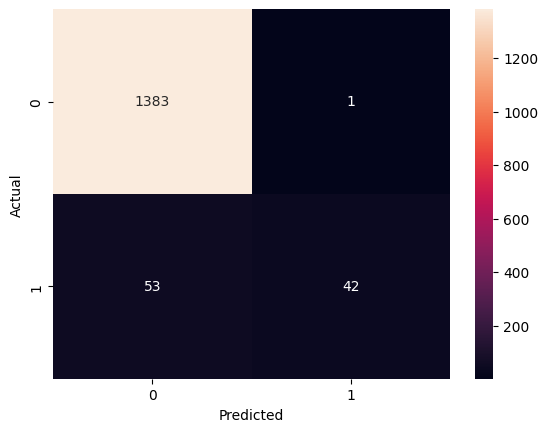

In [80]:
# Use the model to make predictions on the testing data
y_val_pred = log_multic.predict(X_val_multic)

# Evaluate the model
conf_matrix = confusion_matrix(y_val_multic, y_val_pred)
class_report = classification_report(y_val_multic, y_val_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

AUC Score: 0.8591040462427746


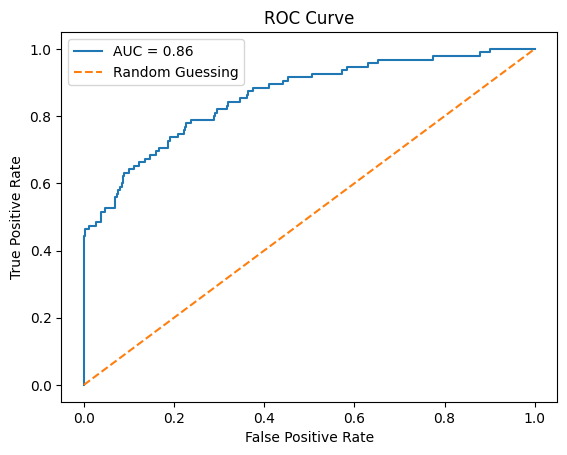

In [81]:
# Calculate the AUC score
y_val_pred_prob = log_multic.predict_proba(X_val_multic)[:, 1] # Use predict with the modified X_test_sm

auc = roc_auc_score(y_val_multic, y_val_pred_prob)
print(f"AUC Score: {auc}")

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_val_multic, y_val_pred_prob)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')  # Random guessing line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

#***Hyperparameter Tuning Best Model***

In [91]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'class_weight': [None, 'balanced', {0:1,1:14}],
    'max_iter':[1000]
}

log_multic = LogisticRegression()

In [92]:
clf= GridSearchCV(log_multic, param_grid, cv=5, scoring='roc_auc')
best_clf=clf.fit(X_train_multic, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

In [93]:
best_clf.best_estimator_

LogisticRegression(C=0.001, class_weight={0: 1, 1: 14}, max_iter=1000,
                   solver='saga')

#***Final Model Evaluation***

In [102]:
# Features for model
X_train_multic = X_train[:, [0, 1, 3, 5, 6, 7, 9, 10, 12, 13]]
X_test_multic = X_test[:, [0, 1, 3, 5, 6, 7, 9, 10, 12, 13]] # Select columns corresponding to 'DXXAPFAT', 'DXXGPFAT', 'BMIcat', agecat, sex, physical activty,ethnicitycat, pir, educationcat, and smkoing'


log_multi = LogisticRegression(C=0.001, class_weight={0:1,1:14}, max_iter=1000, solver='saga')
log_multic.fit(X_train_multic, y_train)

y_test_pred =  log_multic.predict(X_test_multic)

Confusion Matrix:
[[1730    0]
 [  67   52]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      1730
         1.0       1.00      0.44      0.61       119

    accuracy                           0.96      1849
   macro avg       0.98      0.72      0.79      1849
weighted avg       0.97      0.96      0.96      1849



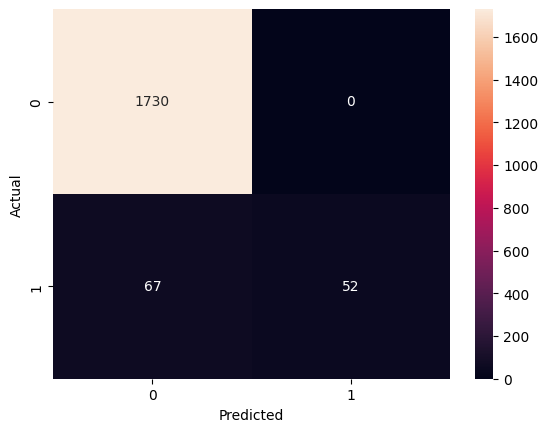

In [103]:
# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

AUC Score: 0.876732889687667


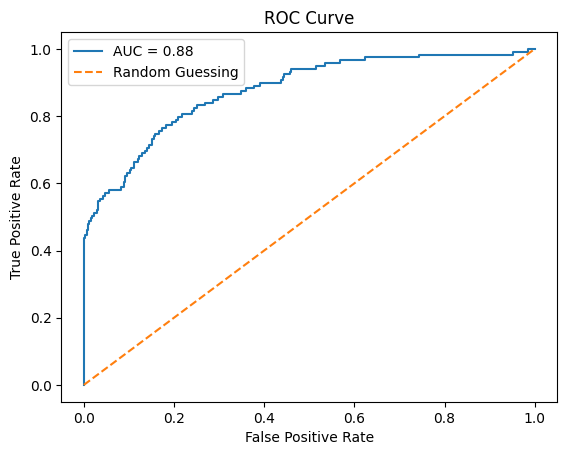

In [104]:
# Calculate the AUC score
y_test_pred = log_multic.predict_proba(X_test_multic)[:, 1] # Use predict with the modified X_test_sm

auc = roc_auc_score(y_test, y_test_pred)
print(f"AUC Score: {auc}")

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')  # Random guessing line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [114]:
from operator import index
X_test_multic_df = pd.DataFrame(X_test_multic, columns=['const','DXXAPFAT', 'DXXGPFAT','BMI_Category','AGE_Category',
                                        'sex', 'ADHERENCE','ETH_Category', 'FAMILYPIR', 'EDU_Category', 'Combo_Smoke'],
                                        index=y_test.index)

# Add a constant term for the intercept
X_test_multic_df= sm.add_constant(X_test_multic_df)

# Create and fit logistic regression model
log_reg = sm.Logit(y_test, X_test_multic_df).fit()

# Get summary report
summary = log_reg.summary()
print(summary)

         Current function value: 0.134838
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:            mortstat7yr   No. Observations:                 1849
Model:                          Logit   Df Residuals:                     1838
Method:                           MLE   Df Model:                           10
Date:                Fri, 28 Feb 2025   Pseudo R-squ.:                  0.4353
Time:                        00:26:59   Log-Likelihood:                -249.32
converged:                      False   LL-Null:                       -441.54
Covariance Type:            nonrobust   LLR p-value:                 1.923e-76
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -3.1019     57.650     -0.054      0.957    -116.094     109.890
DXXAPFAT         0.3863      0.259      1.493      0.135   

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [115]:
# Add a constant term for the intercept
X_test_multic_df = sm.add_constant(X_test_multic_df)

# Create and fit logistic regression model
log_reg = sm.Logit(y_test, X_test_multic_df).fit()

# Get odds ratios and confidence intervals
params = log_reg.params
conf = log_reg.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
odds_ratios = np.exp(conf)

# Print odds ratios and confidence intervals
print(odds_ratios)

         Current function value: 0.134838
         Iterations: 35
                       2.5%          97.5%         OR
const          3.810063e-51   5.306092e+47   0.044963
DXXAPFAT       8.863028e-01   2.442974e+00   1.471467
DXXGPFAT       3.299342e-01   1.052941e+00   0.589407
BMI_Category   6.082634e-01   1.261367e+00   0.875924
AGE_Category  2.067047e-278  1.037047e+281  46.299295
sex            7.948259e-01   1.860694e+00   1.216112
ADHERENCE      4.446724e-01   7.335684e-01   0.571137
ETH_Category   5.462891e-01   9.046631e-01   0.702999
FAMILYPIR      4.414331e-01   8.288106e-01   0.604867
EDU_Category   9.722945e-01   1.676580e+00   1.276765
Combo_Smoke    1.222486e+00   2.089884e+00   1.598391


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
